In [1]:
import getopt
import os
import sys
import tkinter as tk
import tkinter.filedialog as fd
from PIL import ImageTk, Image
import numpy as np
from IPython.display import Image as Im

In [2]:
import tensorflow
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [6]:
def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

In [7]:
class_labels = ["psoriasis", "measles", "melanoma", "ringworm"]

In [8]:
mobile = tensorflow.keras.applications.mobilenet.MobileNet()

x = mobile.layers[-6].output
x = Dropout(0.25)(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)
for layer in model.layers[:-23]:
    layer.trainable = False

model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])
model.load_weights('/content/drive/MyDrive/AI Agent/model.h5')

17235968/17225924 [==============================] - 0s 0us/step


In [9]:
path = '/content/drive/MyDrive/AI Agent/train/ringworm/r76.jpg'

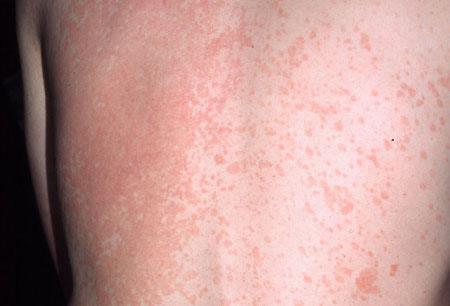

In [10]:
Im(path)

In [11]:
img = load_img(path, target_size=(224, 224))

In [12]:
img_data = img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = tensorflow.keras.applications.mobilenet.preprocess_input(img_data)

In [13]:
pred = model.predict(img_data)

In [14]:
features = np.array(pred)
indice_var = features.argmax(axis=-1)

In [15]:
class_labels[max(indice_var[0][0])]

'measlesf'